<a href="https://colab.research.google.com/github/DariaHrebeniuk17/numerical_methods/blob/main/%D0%9B%D0%B0%D0%B1_7_%D0%93%D1%80%D0%B5%D0%B1%D0%B5%D0%BD%D1%8E%D0%BA_%D0%94_%D0%A1_%D0%A4%D0%86%D0%A2_2_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота №7. Гребенюк Дар'я Сергіївна. ФІТ 2-8. Варіант 5.   Тема : Інтерполяційний багаточлен Ньютона.

# Перша інтерполяційна формула Ньютона

In [34]:
import numpy as np
from math import factorial

x = np.array([3.50, 3.55, 3.60, 3.65, 3.70, 3.75, 3.80, 3.85, 3.90, 3.95, 4.00])
y = np.array([33.1154, 34.8133, 36.5982, 38.4747, 40.4473, 42.5211, 44.7012,
              46.9931, 49.4024, 51.9354, 54.5982])


def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]

    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    q = (x0 - x[0]) / h

    ans = delta_y[0, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q - i + 1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)

    return ans

x1 = 3.522
y1 = newton_forward_interpolation(x, y, x1)

print(f"f({x1}) = {y1}")

f(3.522) = 33.8524443135869


Друга інтерполяційна формула Ньютона (інтерполяція назад)

In [32]:
import numpy as np
from math import factorial

x = np.array([3.50, 3.55, 3.60, 3.65, 3.70, 3.75, 3.80, 3.85, 3.90, 3.95, 4.00])
y = np.array([33.1154, 34.8133, 36.5982, 38.4747, 40.4473, 42.5211, 44.7012,
              46.9931, 49.4024, 51.9354, 54.5982])


def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]

    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    q = (x0 - x[-1]) / h

    ans = delta_y[-1, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q + i - 1)
        ans += (q_prod * delta_y[n-i-1, i]) / factorial(i)

    return ans

x2 = 3.905
y2 = newton_backward_interpolation(x, y, x2)

print(f"f({x2}) = {y2}")


f(3.905) = 49.65001323412701


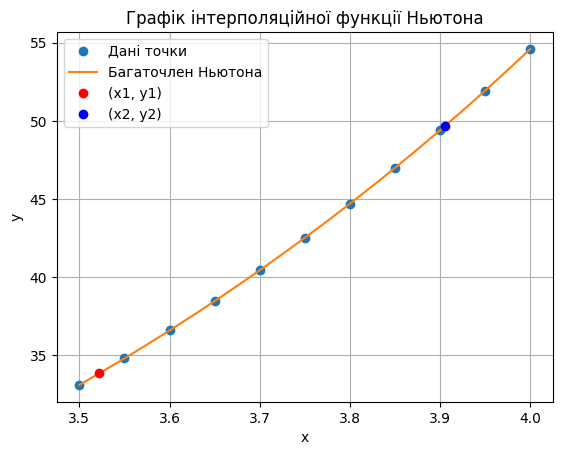

In [35]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
    if xx[i] <= x[len(x) // 2]:
        yy[i] = newton_forward_interpolation(x, y, xx[i])
    else:
        yy[i] = newton_backward_interpolation(x, y, xx[i])

plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label="Багаточлен Ньютона")
plt.plot(x1, y1, 'ro', label='(x1, y1)')
plt.plot(x2, y2, 'bo', label='(x2, y2)')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()